In [ ]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import pymc3 as pm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In this probelm, the book is going to illustrate that prior distribution does not matter if we increase the data:

(Notice that this is kind of an extension of Page_26 and 28)

Sequential sampling (2 chains in 1 job)
Metropolis: [s1]


Sampling 2 chains for 1_000 tune and 20_000 draw iterations (2_000 + 40_000 draws total) took 6 seconds.
The number of effective samples is smaller than 25% for some parameters.


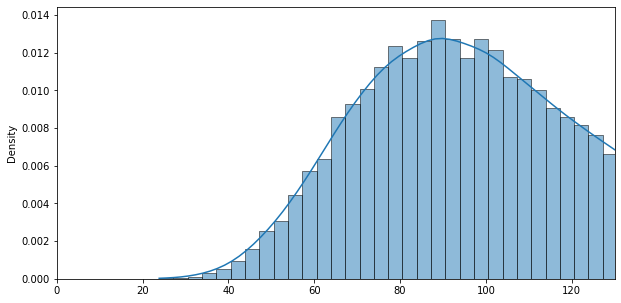

Sequential sampling (2 chains in 1 job)
Metropolis: [s2]


/usr/local/lib/python3.7/dist-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),


Sampling 2 chains for 1_000 tune and 20_000 draw iterations (2_000 + 40_000 draws total) took 6 seconds.
The number of effective samples is smaller than 25% for some parameters.


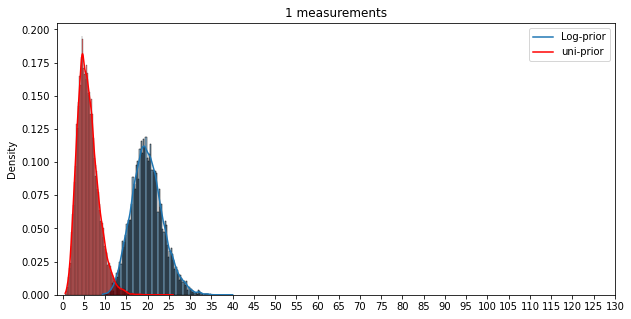

Sequential sampling (2 chains in 1 job)
Metropolis: [s1]


Sampling 2 chains for 1_000 tune and 20_000 draw iterations (2_000 + 40_000 draws total) took 6 seconds.
The number of effective samples is smaller than 25% for some parameters.
Sequential sampling (2 chains in 1 job)
Metropolis: [s2]


/usr/local/lib/python3.7/dist-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),


Sampling 2 chains for 1_000 tune and 20_000 draw iterations (2_000 + 40_000 draws total) took 6 seconds.
The number of effective samples is smaller than 25% for some parameters.


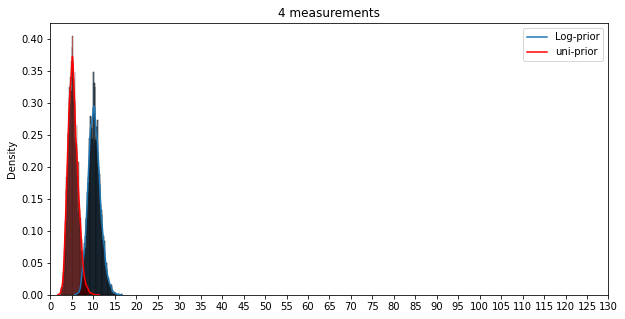

Sequential sampling (2 chains in 1 job)
Metropolis: [s1]


/usr/local/lib/python3.7/dist-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),


Sampling 2 chains for 1_000 tune and 20_000 draw iterations (2_000 + 40_000 draws total) took 6 seconds.
The number of effective samples is smaller than 25% for some parameters.
Sequential sampling (2 chains in 1 job)
Metropolis: [s2]


/usr/local/lib/python3.7/dist-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),


Sampling 2 chains for 1_000 tune and 20_000 draw iterations (2_000 + 40_000 draws total) took 6 seconds.
The number of effective samples is smaller than 25% for some parameters.


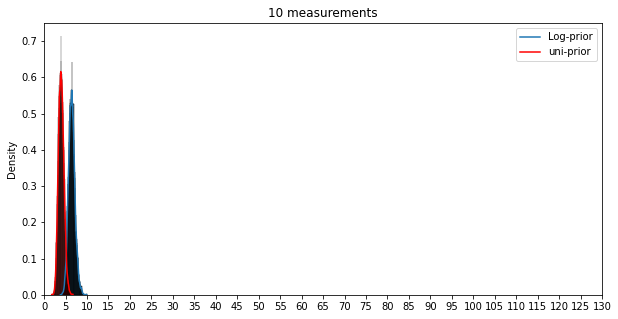

In [ ]:
a = np.random.poisson(lam = 4 , size = (1,40))
d = a.ravel()
n = [1,4,10]
t = 1
z = 1
for i in n:
    data = d[:i]
    with pm.Model():
        s1 = pm.Lognormal('s1', mu = 4.605 , sigma = 0.33)
        obs1 = pm.Poisson('obs1',mu = s1 ,observed = data)
        step = pm.Metropolis()
        trace = pm.sample(20000,step)
        if z == 1:
            z = z + 1
            trace3 = pm.sample_prior_predictive(samples=20000)
            plt.figure(figsize=(10,5))
            sns.histplot(trace3['s1'], stat = 'density' , kde = 1)
            plt.xlim(0,130)
            plt.show()
    with pm.Model():
        s2 = pm.Uniform('s2',0,10**7) # s = prior
        obs2 = pm.Poisson('obs2',mu = s2,observed=data)
        step = pm.Metropolis()
        trace2 = pm.sample(20000,step)
    plt.figure(figsize=(10,5))
    sns.histplot(trace['s1'], stat = 'density' , kde = 1)
    sns.histplot(trace2['s2'], stat = 'density' , kde = 1, color = 'r')
    plt.legend(['Log-prior','uni-prior'])
    plt.xticks(np.arange(0,135,5))
    plt.title('{} measurements'.format(i))
    plt.show()